In [1]:
from ultralytics import YOLO
#model = YOLO('yolov8x-segreg.yaml')
model = YOLO('/home/thomas/Documents/scratch_thomas/GitHub/ultralytics-custom/ultralytics/runs/segment/train718/weights/best.pt')  ## Pretrained model nano + design variable classic style trained. Dice loss with classic variables
#model = YOLO('/home/thomas/Documents/scratch_thomas/GitHub/ultralytics-custom/ultralytics/runs/segment/yolov8x-segreg3/weights/best.pt')

In [2]:
def freeze_except_regression_head(trainer):
    model = trainer.model
    print("Freezing layers except those with 'regression_head'")
    for k, v in model.named_parameters(): 
        if 'regression_head' not in k:
            print(f'freezing {k}')
            v.requires_grad = False 
        else:
            v.requires_grad = True
    print("Layers with 'regression_head' are unfrozen.")

In [3]:

# model.add_callback("on_train_start", freeze_except_regression_head)
model.train(data = '/home/thomas/Documents/scratch_thomas/yolov8_dataset/dataset_combined_feb2/data.yaml', 
            mosaic = 1.0,
            hsv_h= 0.5,  # (float) image HSV-Hue augmentation (fraction)
            hsv_s= 0.5,  # (float) image HSV-Saturation augmentation (fraction)
            hsv_v= 0.5,  # (float) image HSV-Value augmentation (fraction)
            degrees= 25.0,  # (float) image rotation (+/- deg)
            translate= 0.2,  # (float) image translation (+/- fraction)
            scale= 0.75,  # (float) image scale (+/- gain)
            shear= 10.0,  # (float) image shear (+/- deg)
            perspective= 0.001,  # (float) image perspective (+/- fraction), range 0-0.001
            flipud= 0.5,  # (float) image flip up-down (probability)
            fliplr= 0.5,
            epochs=1000, 
            batch=6,
            reg_gain = 1.0,
            amp = True,
            warmup_epochs=0,
            imgsz=int(640),
            workers=12,
            lr0=3e-4,
            cache = "ram",
            cos_lr = True,
            single_cls=True,
            rect=False,
            overlap_mask=False,
            mask_ratio=1,
            optimizer = "AdamW",
            pretrained=False,
            patience=100,
            weight_decay=1e-2, 
            val=True,
            resume=True,
            plots=True
            )

New https://pypi.org/project/ultralytics/8.1.20 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.166 🚀 Python-3.11.7 torch-2.0.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3090, 24268MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-segreg.yaml, data=/home/thomas/Documents/scratch_thomas/yolov8_dataset/dataset_combined_feb2/data.yaml, epochs=1000, patience=100, batch=6, imgsz=640, save=True, save_period=-1, cache=ram, device=None, workers=12, project=None, name=None, exist_ok=False, pretrained=False, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=True, close_mosaic=10, resume=None, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=False, mask_ratio=1, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_

{'metrics/precision(B)': 0.6402384835796695, 'metrics/recall(B)': 0.5860851742199954, 'metrics/mAP50(B)': 0.6497385252295813, 'metrics/mAP50-95(B)': 0.346196917954957, 'metrics/precision(M)': 0.4143290711872858, 'metrics/recall(M)': 0.36386927806877706, 'metrics/mAP50(M)': 0.2973292072551421, 'metrics/mAP50-95(M)': 0.08713220921312768, 'fitness': 0.48470298769974857, 'mae': 1.0, 'mse': 1.0, 'error_1': 1.0}



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss   reg_loss  Instances       Size
     2/1000      12.6G      1.743      2.328      1.366      2.131     0.3284        212        640: 100%|██████████| 2770/2770 [13:14<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:13<00:00,  7.44it/s]
                   all       1235      17564      0.793      0.678      0.782      0.494      0.699      0.541       0.58      0.226


{'metrics/precision(B)': 0.7929560443327002, 'metrics/recall(B)': 0.6782054201776361, 'metrics/mAP50(B)': 0.7815627770458672, 'metrics/mAP50-95(B)': 0.49351354997417285, 'metrics/precision(M)': 0.6986125460262634, 'metrics/recall(M)': 0.5409606828418033, 'metrics/mAP50(M)': 0.5795734147673494, 'metrics/mAP50-95(M)': 0.2264073056041688, 'fitness': 0.7840423892018292, 'mae': 1.0, 'mse': 1.0, 'error_1': 1.0}



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss   reg_loss  Instances       Size
     3/1000      9.37G      1.607      2.165      1.251      1.965     0.3054        239        640:  12%|█▏        | 346/2770 [01:39<12:51,  3.14it/s]/scratch/thomas/GitHub/ultralytics-custom/ultralytics/data/augment.py:390: RuntimeWarning: divide by zero encountered in divide
  xy = xy[:, :2] / xy[:, 2:3]
     3/1000        11G       1.55      2.091      1.206      1.901     0.2936        230        640:  78%|███████▊  | 2147/2770 [10:18<03:01,  3.43it/s]/scratch/thomas/GitHub/ultralytics-custom/ultralytics/data/augment.py:390: RuntimeWarning: divide by zero encountered in divide
  xy = xy[:, :2] / xy[:, 2:3]
     3/1000        11G      1.536      2.073      1.195      1.884     0.2916        256        640: 100%|██████████| 2770/2770 [13:19<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP5

{'metrics/precision(B)': 0.8299419940138055, 'metrics/recall(B)': 0.7144727852425415, 'metrics/mAP50(B)': 0.8164149820594472, 'metrics/mAP50-95(B)': 0.5511074035835126, 'metrics/precision(M)': 0.7416630810805136, 'metrics/recall(M)': 0.6067429305871574, 'metrics/mAP50(M)': 0.6520040310603431, 'metrics/mAP50-95(M)': 0.3015267822324497, 'fitness': 0.9142126685463452, 'mae': 1.0, 'mse': 1.0, 'error_1': 1.0}



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss   reg_loss  Instances       Size
     4/1000      11.2G      1.435      1.931       1.11      1.765     0.2743        240        640:  76%|███████▋  | 2114/2770 [10:07<03:11,  3.42it/s]/scratch/thomas/GitHub/ultralytics-custom/ultralytics/data/augment.py:390: RuntimeWarning: divide by zero encountered in divide
  xy = xy[:, :2] / xy[:, 2:3]
     4/1000      11.8G      1.423      1.914        1.1      1.751     0.2723        243        640: 100%|██████████| 2770/2770 [13:14<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:13<00:00,  7.42it/s]
                   all       1235      17564      0.865      0.739      0.847      0.592      0.836      0.677      0.755      0.369


{'metrics/precision(B)': 0.8652519478126189, 'metrics/recall(B)': 0.7392269860386462, 'metrics/mAP50(B)': 0.8466214404170276, 'metrics/mAP50-95(B)': 0.5916145928282088, 'metrics/precision(M)': 0.8356730272541387, 'metrics/recall(M)': 0.676937555866046, 'metrics/mAP50(M)': 0.7548100714776818, 'metrics/mAP50-95(M)': 0.36855399535414396, 'fitness': 1.0242948805535885, 'mae': 1.0, 'mse': 1.0, 'error_1': 1.0}



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss   reg_loss  Instances       Size
     5/1000      11.5G      1.351      1.811      1.035      1.672     0.2611        173        640: 100%|██████████| 2770/2770 [13:16<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:13<00:00,  7.40it/s]
                   all       1235      17564      0.862      0.761      0.856      0.615      0.827      0.699      0.769      0.378


{'metrics/precision(B)': 0.8617649678205144, 'metrics/recall(B)': 0.7606230119894433, 'metrics/mAP50(B)': 0.8562567890115179, 'metrics/mAP50-95(B)': 0.6151937486803445, 'metrics/precision(M)': 0.8272092423174405, 'metrics/recall(M)': 0.6994039701281787, 'metrics/mAP50(M)': 0.7688606838848093, 'metrics/mAP50-95(M)': 0.3782106039309582, 'fitness': 1.0565756646398052, 'mae': 1.0, 'mse': 1.0, 'error_1': 1.0}



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss   reg_loss  Instances       Size
     6/1000      9.66G      1.295      1.734      0.986      1.611      0.253        145        640: 100%|██████████| 2770/2770 [13:17<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:14<00:00,  7.35it/s]
                   all       1235      17564      0.884      0.769       0.87      0.631      0.868      0.725      0.808      0.428


{'metrics/precision(B)': 0.8839503669474998, 'metrics/recall(B)': 0.7694716465497609, 'metrics/mAP50(B)': 0.8703505362321887, 'metrics/mAP50-95(B)': 0.6306087363056248, 'metrics/precision(M)': 0.868029751723137, 'metrics/recall(M)': 0.7252903666590754, 'metrics/mAP50(M)': 0.8078966655348658, 'metrics/mAP50-95(M)': 0.42837579775554024, 'fitness': 1.1209108008317539, 'mae': 1.0, 'mse': 1.0, 'error_1': 1.0}



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss   reg_loss  Instances       Size
     7/1000      11.1G      1.253      1.668     0.9486      1.565     0.2467        177        640: 100%|██████████| 2770/2770 [13:17<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:14<00:00,  7.35it/s]
                   all       1235      17564        0.9      0.793      0.888      0.665      0.872      0.757      0.828       0.45


{'metrics/precision(B)': 0.8997299032988036, 'metrics/recall(B)': 0.792928717831929, 'metrics/mAP50(B)': 0.8878400397270312, 'metrics/mAP50-95(B)': 0.6652836245975573, 'metrics/precision(M)': 0.8716510757363348, 'metrics/recall(M)': 0.757076380069434, 'metrics/mAP50(M)': 0.8282643252894564, 'metrics/mAP50-95(M)': 0.45032605922777486, 'fitness': 1.1756591519444477, 'mae': 1.0, 'mse': 1.0, 'error_1': 1.0}



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss   reg_loss  Instances       Size
     8/1000      14.8G      1.217      1.616      0.918      1.529     0.2416        250        640: 100%|██████████| 2770/2770 [13:17<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:13<00:00,  7.39it/s]
                   all       1235      17564      0.911      0.798      0.894      0.675      0.891      0.765      0.843      0.479


{'metrics/precision(B)': 0.9109829803236483, 'metrics/recall(B)': 0.7982415916257866, 'metrics/mAP50(B)': 0.8940292270676066, 'metrics/mAP50-95(B)': 0.6752768221402906, 'metrics/precision(M)': 0.8910337328429057, 'metrics/recall(M)': 0.7649738100660441, 'metrics/mAP50(M)': 0.8430813866523614, 'metrics/mAP50-95(M)': 0.479455578394172, 'fitness': 1.2129702218530132, 'mae': 1.0, 'mse': 1.0, 'error_1': 1.0}



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss   reg_loss  Instances       Size
     9/1000        11G      1.186      1.578     0.8926      1.498     0.2366        214        640: 100%|██████████| 2770/2770 [13:18<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:13<00:00,  7.38it/s]
                   all       1235      17564      0.913      0.809      0.899       0.68      0.905      0.779      0.856      0.492


{'metrics/precision(B)': 0.9133462666688051, 'metrics/recall(B)': 0.8085288089273514, 'metrics/mAP50(B)': 0.8986397519892186, 'metrics/mAP50-95(B)': 0.6797196662127373, 'metrics/precision(M)': 0.9049647916909904, 'metrics/recall(M)': 0.778535039822332, 'metrics/mAP50(M)': 0.8561112466637404, 'metrics/mAP50-95(M)': 0.49230111810724975, 'fitness': 1.2302938057532842, 'mae': 1.0, 'mse': 1.0, 'error_1': 1.0}



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss   reg_loss  Instances       Size
    10/1000      9.89G      1.159      1.537     0.8713      1.472     0.2316        198        640: 100%|██████████| 2770/2770 [13:21<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:13<00:00,  7.37it/s]
                   all       1235      17564      0.913      0.814      0.904       0.69      0.906      0.782      0.861      0.502


{'metrics/precision(B)': 0.9125301988200882, 'metrics/recall(B)': 0.8143350592678764, 'metrics/mAP50(B)': 0.9035984728881797, 'metrics/mAP50-95(B)': 0.6898009793015126, 'metrics/precision(M)': 0.9056535256920833, 'metrics/recall(M)': 0.781940332498292, 'metrics/mAP50(M)': 0.8609623052486047, 'metrics/mAP50-95(M)': 0.5019552366533901, 'fitness': 1.2490366721730908, 'mae': 1.0, 'mse': 1.0, 'error_1': 1.0}



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss   reg_loss  Instances       Size
    11/1000      10.9G      1.137       1.51     0.8529       1.45     0.2287        161        640: 100%|██████████| 2770/2770 [13:21<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:14<00:00,  7.35it/s]
                   all       1235      17564      0.919      0.819      0.909      0.703      0.911      0.792      0.871      0.513


{'metrics/precision(B)': 0.9194578386583824, 'metrics/recall(B)': 0.8191186517877477, 'metrics/mAP50(B)': 0.9092370269419424, 'metrics/mAP50-95(B)': 0.7027155367738971, 'metrics/precision(M)': 0.9107257601452514, 'metrics/recall(M)': 0.7917900250512412, 'metrics/mAP50(M)': 0.8706219534286105, 'metrics/mAP50-95(M)': 0.5133659257548626, 'fitness': 1.272459214312939, 'mae': 1.0, 'mse': 1.0, 'error_1': 1.0}



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss   reg_loss  Instances       Size
    12/1000      13.7G       1.12      1.482     0.8362      1.431     0.2258        193        640: 100%|██████████| 2770/2770 [13:19<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:13<00:00,  7.36it/s]
                   all       1235      17564      0.925      0.825      0.912      0.714      0.916      0.805      0.881      0.534


{'metrics/precision(B)': 0.9249955523222926, 'metrics/recall(B)': 0.8249829196082897, 'metrics/mAP50(B)': 0.9122570069121444, 'metrics/mAP50-95(B)': 0.7144350050584429, 'metrics/precision(M)': 0.9162294875322983, 'metrics/recall(M)': 0.8050557959462536, 'metrics/mAP50(M)': 0.8810954826476851, 'metrics/mAP50-95(M)': 0.5335743557012328, 'fitness': 1.3025436736396911, 'mae': 1.0, 'mse': 1.0, 'error_1': 1.0}



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss   reg_loss  Instances       Size
    13/1000      11.5G      1.107      1.464     0.8271      1.417     0.2236        156        640: 100%|██████████| 2770/2770 [13:18<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:13<00:00,  7.36it/s]
                   all       1235      17564      0.929      0.828      0.915      0.722      0.922       0.81      0.884      0.541


{'metrics/precision(B)': 0.9289501484901419, 'metrics/recall(B)': 0.8282851286722842, 'metrics/mAP50(B)': 0.9154761661040043, 'metrics/mAP50-95(B)': 0.7218063764113458, 'metrics/precision(M)': 0.9219447584119097, 'metrics/recall(M)': 0.8101799134593487, 'metrics/mAP50(M)': 0.8841092971475022, 'metrics/mAP50-95(M)': 0.541229073544766, 'fitness': 1.3166904512856514, 'mae': 1.0, 'mse': 1.0, 'error_1': 1.0}



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss   reg_loss  Instances       Size
    14/1000      11.8G      1.086      1.429     0.8107      1.399     0.2202        183        640: 100%|██████████| 2770/2770 [13:20<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:13<00:00,  7.39it/s]
                   all       1235      17564      0.933      0.834      0.919      0.727      0.927      0.817      0.892      0.547


{'metrics/precision(B)': 0.9327962105116466, 'metrics/recall(B)': 0.8337234980368663, 'metrics/mAP50(B)': 0.919490019115624, 'metrics/mAP50-95(B)': 0.7274972098078636, 'metrics/precision(M)': 0.9272363713192427, 'metrics/recall(M)': 0.8169417139754193, 'metrics/mAP50(M)': 0.8924332454058767, 'metrics/mAP50-95(M)': 0.546905026403137, 'fitness': 1.3281543390420505, 'mae': 1.0, 'mse': 1.0, 'error_1': 1.0}



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss   reg_loss  Instances       Size
    15/1000      12.5G      1.076       1.42     0.8019      1.389      0.219        250        640: 100%|██████████| 2770/2770 [13:19<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:13<00:00,  7.36it/s]
                   all       1235      17564      0.931      0.839      0.923      0.737      0.926      0.821      0.895      0.557


{'metrics/precision(B)': 0.9306973476752702, 'metrics/recall(B)': 0.8389319061717149, 'metrics/mAP50(B)': 0.9226601491254165, 'metrics/mAP50-95(B)': 0.7370922574568648, 'metrics/precision(M)': 0.9264359853211377, 'metrics/recall(M)': 0.8211682987929857, 'metrics/mAP50(M)': 0.8950632357955037, 'metrics/mAP50-95(M)': 0.5567521542706928, 'fitness': 1.346232309046894, 'mae': 1.0, 'mse': 1.0, 'error_1': 1.0}



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss   reg_loss  Instances       Size
    16/1000      11.8G      1.061      1.397     0.7907      1.375     0.2165        237        640: 100%|██████████| 2770/2770 [13:22<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:13<00:00,  7.45it/s]
                   all       1235      17564      0.941      0.839      0.923      0.739      0.936      0.825      0.899      0.565


{'metrics/precision(B)': 0.9411199726650119, 'metrics/recall(B)': 0.8387611022546118, 'metrics/mAP50(B)': 0.9232442367905388, 'metrics/mAP50-95(B)': 0.738583440725953, 'metrics/precision(M)': 0.9355587279422894, 'metrics/recall(M)': 0.8248121156911865, 'metrics/mAP50(M)': 0.8990413728408981, 'metrics/mAP50-95(M)': 0.5649985284275404, 'fitness': 1.355452333201288, 'mae': 1.0, 'mse': 1.0, 'error_1': 1.0}



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss   reg_loss  Instances       Size
    17/1000      11.2G      1.051      1.384     0.7821      1.366     0.2142        264        640: 100%|██████████| 2770/2770 [13:19<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:13<00:00,  7.42it/s]
                   all       1235      17564      0.944      0.844      0.927      0.746      0.938      0.833      0.904      0.575


{'metrics/precision(B)': 0.944332236770012, 'metrics/recall(B)': 0.8441294431530141, 'metrics/mAP50(B)': 0.9271175770290059, 'metrics/mAP50-95(B)': 0.7464240848355119, 'metrics/precision(M)': 0.9379897155080359, 'metrics/recall(M)': 0.8326121612388977, 'metrics/mAP50(M)': 0.903971706783854, 'metrics/mAP50-95(M)': 0.5752176317677324, 'fitness': 1.372586473324206, 'mae': 1.0, 'mse': 1.0, 'error_1': 1.0}



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss   reg_loss  Instances       Size
    18/1000      11.4G       1.04      1.368     0.7736      1.354     0.2127        277        640: 100%|██████████| 2770/2770 [13:24<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:14<00:00,  7.33it/s]
                   all       1235      17564      0.938      0.852       0.93       0.75      0.935      0.841      0.909      0.584


{'metrics/precision(B)': 0.9383634137223494, 'metrics/recall(B)': 0.8520450914742268, 'metrics/mAP50(B)': 0.9295170136430668, 'metrics/mAP50-95(B)': 0.7504560435500903, 'metrics/precision(M)': 0.9350183644623167, 'metrics/recall(M)': 0.8410954224550217, 'metrics/mAP50(M)': 0.9093789535464176, 'metrics/mAP50-95(M)': 0.5841667757472151, 'fitness': 1.3850501340865233, 'mae': 1.0, 'mse': 1.0, 'error_1': 1.0}



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss   reg_loss  Instances       Size
    19/1000      10.1G      1.031       1.36     0.7652      1.344     0.2118        159        640: 100%|██████████| 2770/2770 [13:21<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 103/103 [00:13<00:00,  7.41it/s]
                   all       1235      17564      0.942      0.851      0.931      0.755      0.938      0.839      0.911      0.583


{'metrics/precision(B)': 0.9418217111842824, 'metrics/recall(B)': 0.851400592120246, 'metrics/mAP50(B)': 0.9313648911124631, 'metrics/mAP50-95(B)': 0.7553046702575117, 'metrics/precision(M)': 0.9377651455894389, 'metrics/recall(M)': 0.8389319061717149, 'metrics/mAP50(M)': 0.9108322431286014, 'metrics/mAP50-95(M)': 0.5833353466192549, 'fitness': 1.3889957286131964, 'mae': 1.0, 'mse': 1.0, 'error_1': 1.0}



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss   reg_loss  Instances       Size
    20/1000      11.6G      1.022      1.347     0.7593      1.337     0.2103        186        640:  76%|███████▌  | 2094/2770 [10:03<03:14,  3.47it/s]


KeyboardInterrupt: 

In [ ]:
model.val(data = '/home/thomas/Documents/scratch_thomas/yolov8_dataset/dataset_combined_feb2/data.yaml',imgsz=640)

In [ ]:
# I want to test the A.ElasticTransform from albumentations on the /home/thomas/Documents/GitHub/ultralytics-custom/ultralytics/Screenshot 2023-11-22 at 10.00.19 AM.png

import albumentations as A
import cv2

image = cv2.imread("/home/thomas/Documents/GitHub/ultralytics-custom/ultralytics/images (6).png")

transform = A.ElasticTransform(p=1,sigma=25,alpha=400,alpha_affine=0,border_mode=0,value=[255,255,255],approximate=True,same_dxdy=True)#num_steps=30,interpolation = cv2.INTER_CUBIC, distort_limit = 0.7, border_mode=0,normalized=True,value=[255,255,255])
transform = A.HueSaturationValue (hue_shift_limit=50, sat_shift_limit=50, val_shift_limit=50, always_apply=False, p=1.0)
transformed = transform(image=image)

transformed_image = transformed["image"]

#plot the two images side by side:
import matplotlib.pyplot as plt

f, axarr = plt.subplots(1,2)
axarr[0].imshow(image)
axarr[1].imshow(transformed_image)
#dont show axis:
axarr[0].axis('off')
axarr[1].axis('off')


In [ ]:
# Show the results
from PIL import Image
results = model("/home/thomas/Documents/scratch_thomas/GitHub/ultralytics-custom/ultralytics/dataset_ood_test/porous_right_topo_padded.png", conf=0.05, iou=0.9, imgsz=640)

for r in results:
    im_array = r.plot(boxes=True,labels=False,line_width=1)  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    im.show()  # show image
    im.save('results.jpg')  # save image


In [ ]:
# Load masks.npy:
import numpy as np
import matplotlib.pyplot as plt
masks = np.load("/home/thomas/Documents/scratch_thomas/GitHub/ultralytics-custom/ultralytics/masks.npy")

plt.imshow(masks[10])

In [42]:
# Show the results
from PIL import Image
from pillow_heif import register_heif_opener

from PIL import Image, ImageOps
import math

# Load the image
# image_path = '/home/thomas/Documents/GitHub/ultralytics-custom/ultralytics/dataset_simp_nov28/20231121-055317-649044.png'

image_path = '/home/thomas/Documents/scratch_thomas/GitHub/ultralytics-custom/ultralytics/dataset_ood_test/porous_right_topo_padded.png'
#image_path = '/home/thomas/Documents/scratch_thomas/GitHub/ultralytics-custom/ultralytics/dataset_ood_test/compmech_topo_padded.png'
#image_path = '/home/thomas/Documents/scratch_thomas/GitHub/ultralytics-custom/ultralytics/dataset_ood_test/porous_left_topo_padded.png'
image_path = "/home/thomas/Documents/scratch_thomas/GitHub/ultralytics-custom/ultralytics/dataset_ood_test/levelset_20_topo_padded.png"
#image_path = "/home/thomas/Documents/scratch_thomas/GitHub/ultralytics-custom/ultralytics/Screenshot 2024-03-07 at 5.04.07 PM.png"
#image_path = '/home/thomas/Documents/scratch_thomas/yolov8_dataset/dataset_combined_feb2/test/20231120-134257-113740.png'
#image_path = "/home/thomas/Documents/scratch_thomas/GitHub/ultralytics-custom/ultralytics/dataset_simp_nov28/20231121-060417-268796.png"
# image_path = '/home/thomas/Documents/GitHub/ultralytics-custom/ultralytics/Screenshot 2023-10-24 at 12.22.18 PM.png'
image_path = "/home/thomas/Documents/scratch_thomas/GitHub/ultralytics-custom/ultralytics/test_handdrawing.jpeg"
image_path = "/home/thomas/Documents/scratch_thomas/GitHub/ultralytics-custom/ultralytics/Screenshot 2023-12-04 at 11.32.41 AM.png"
image = Image.open(image_path)

register_heif_opener()

#image = Image.open('/home/thomas/Documents/scratch_thomas/GitHub/ultralytics-custom/ultralytics/IMG_6475.HEIC')

#Threshold the image pixels to 0 and 255

# Print the size of the image
print(f"Image size: {image.size}")


# # Function to calculate padding required to make width or height a multiple of 'stride'
# def calculate_padding(current, stride):
#     return (stride - (current % stride)) % stride

# # Get current dimensions
# width, height = image.size

# # Calculate required padding
# padding_right = calculate_padding(width, 32)
# padding_bottom = calculate_padding(height, 32)

# # Note: ImageOps.expand adds padding equally to all sides, so we double the right and bottom padding and then crop
# padded_image = ImageOps.expand(image, border=(0, 0, padding_right * 2, padding_bottom * 2), fill='white')
# padded_image = padded_image.crop((0, 0, width + padding_right, height + padding_bottom))

# print("Image size:", padded_image.size)

Image size: (760, 602)


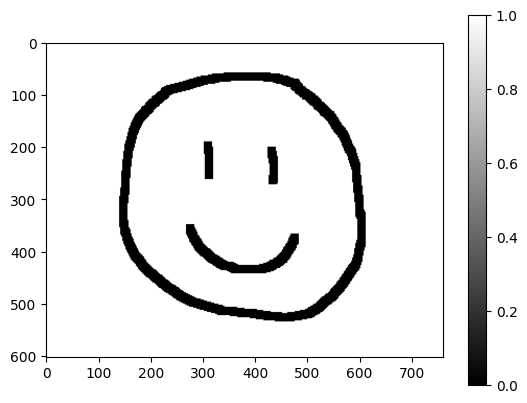

In [43]:
import matplotlib.pyplot as plt
import numpy as np
# Convert the image to grayscale
gray_image = image.convert('L')
# Set a threshold value
threshold_value = 0.4*255# You can adjust this value
# Apply thresholding
binary_image = gray_image.point(lambda x: 255 if x > threshold_value else 0, '1')
# Print the size of the image
plt.imshow(np.array(binary_image),cmap = 'gray')
plt.colorbar()


In [45]:
# Upscale the image by 2x:

# Upscale the image by 2x
upscale_factor = 1.0
upscaled_image = binary_image.resize(
    (int(image.width * upscale_factor), int(image.height * upscale_factor)),
    resample=Image.BICUBIC
)
# upscaled_image = up

# Print the size of the upscaled image
print(f"Upscaled image size: {upscaled_image.size}")
#show the upscaled image:
#upscaled_image.save("/home/thomas/Documents/scratch_thomas/GitHub/ultralytics-custom/ultralytics/binary_image.png")

Upscaled image size: (760, 602)


In [46]:

# Process the image with your model
#results = model(image, conf=0.05,iou=1.0,imgsz = 640,max_det = 2000)
#results = model(upscaled_image, conf= 0.05, iou=0.3, imgsz=(upscaled_image.height, upscaled_image.width),max_det=500)
results = model(upscaled_image, conf=0.05,iou=0.5,imgsz =640)

for r in results:
    im_array = r.plot(boxes=True,labels=False,line_width=1)  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    im.show()  # show image
    im.save('results.jpg')  # save image

prediction_tensor = results[0].regression_preds.to('cpu').detach()



0: 512x640 24 mmc_components, 132.4ms
Speed: 17.3ms preprocess, 132.4ms inference, 258.2ms postprocess per image at shape (1, 3, 512, 640)


---
## Inference code:

In [2]:
import torch
import numpy as np
import torch.nn.functional as F
import torch.nn as nn
class CustomTverskyLoss(nn.Module):
    def __init__(self, alpha=0.1, beta=0.9, size_average=True):
        super(CustomTverskyLoss, self).__init__()
        self.alpha = alpha
        self.beta = beta
        self.size_average = size_average

    def forward(self, inputs, targets, smooth=1):
        # If your model contains a sigmoid or equivalent activation layer, comment this line
        # inputs = F.sigmoid(inputs)

        # Check if the input tensors are of expected shape
        if inputs.shape != targets.shape:
            raise ValueError("Shape mismatch: inputs and targets must have the same shape")

        # Compute Tversky loss for each sample in the batch
        tversky_loss_values = []
        for input_sample, target_sample in zip(inputs, targets):
            # Flatten tensors for each sample
            input_sample = input_sample.view(-1)
            target_sample = target_sample.view(-1)

            # Calculate the true positives, false positives, and false negatives
            true_positives = (input_sample * target_sample).sum()
            false_positives = (input_sample * (1 - target_sample)).sum()
            false_negatives = ((1 - input_sample) * target_sample).sum()

            # Compute the Tversky index for each sample
            tversky_index = (true_positives + smooth) / (true_positives + self.alpha * false_positives + self.beta * false_negatives + smooth)

            tversky_loss_values.append(1 - tversky_index)

        # Convert list of Tversky loss values to a tensor
        tversky_loss_values = torch.stack(tversky_loss_values)

        # If you want the average loss over the batch to be returned
        if self.size_average:
            return tversky_loss_values.mean()
        else:
            # If you want individual losses for each sample in the batch
            return tversky_loss_values

class CustomDiceLoss(nn.Module):
    def __init__(self, weight=None, size_average=True):
        super(CustomDiceLoss, self).__init__()
        self.size_average = size_average
    def forward(self, inputs, targets, smooth=1):
        
        # If your model contains a sigmoid or equivalent activation layer, comment this line
        #inputs = F.sigmoid(inputs)       
      
        # Check if the input tensors are of expected shape
        if inputs.shape != targets.shape:
            raise ValueError("Shape mismatch: inputs and targets must have the same shape")

        # Compute Dice loss for each sample in the batch
        dice_loss_values = []
        for input_sample, target_sample in zip(inputs, targets):
            
            # Flatten tensors for each sample
            input_sample = input_sample.view(-1)
            target_sample = target_sample.view(-1)

            intersection = (input_sample * target_sample).sum()
            dice = (2. * intersection + smooth) / (input_sample.sum() + target_sample.sum() + smooth)
            
            dice_loss_values.append(1 - dice)

        # Convert list of Dice loss values to a tensor
        dice_loss_values = torch.stack(dice_loss_values)

        # If you want the average loss over the batch to be returned
        if self.size_average:
            return dice_loss_values.mean()
        else:
            # If you want individual losses for each sample in the batch
            return dice_loss_values

def smooth_heaviside(phi, alpha, epsilon):
    # Scale and shift phi for the sigmoid function
    scaled_phi = (phi - alpha) / epsilon
    
    # Apply the sigmoid function
    H = torch.sigmoid(scaled_phi)

    return H
def calc_Phi(variable, LSgrid):
    device = variable.device  # Get the device of the variable

    x0 = variable[0]
    y0 = variable[1]
    L = variable[2]
    t = variable[3]  # Constant thickness
    angle = variable[4]

    # Rotation
    st = torch.sin(angle)
    ct = torch.cos(angle)
    x1 = ct * (LSgrid[0][:, None].to(device) - x0) + st * (LSgrid[1][:, None].to(device) - y0) 
    y1 = -st * (LSgrid[0][:, None].to(device) - x0) + ct * (LSgrid[1][:, None].to(device) - y0)

    # Regularized hyperellipse equation
    a = L / 2  # Semi-major axis
    b = t / 2  # Constant semi-minor axis
    small_constant = 1e-9  # To avoid division by zero
    temp = ((x1 / (a + small_constant))**6) + ((y1 / (b + small_constant))**6)

    # # Ensuring the hyperellipse shape
    allPhi = 1 - (temp + small_constant)**(1/6)
    
    # # Call Heaviside function with allPhi
    alpha = torch.tensor(0.0, device=device, dtype=torch.float32)
    epsilon = torch.tensor(0.001, device=device, dtype=torch.float32)
    H_phi = smooth_heaviside(allPhi, alpha, epsilon)
    return allPhi, H_phi

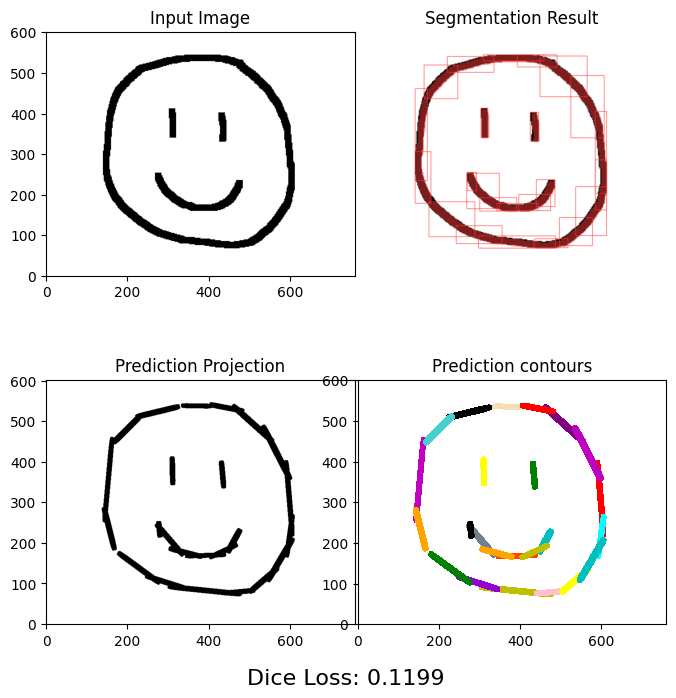

In [49]:
from PIL import Image
import matplotlib.pyplot as plt

from matplotlib.colors import TwoSlopeNorm


input_image = upscaled_image
# The rest of the processing steps as in the original code
input_image_array = np.array(input_image.convert('L'))

input_image_array_tensor = torch.tensor(input_image_array)
input_image_array_tensor = input_image_array_tensor / 255.0
input_image_array_tensor = 1.0 - input_image_array_tensor
input_image_array_tensor = torch.flip(input_image_array_tensor, [0])

# Get the segmentation result
for r in results:
    im_array = r.plot(boxes=True, labels=False, line_width=1)
    seg_result = Image.fromarray(im_array[..., ::-1])

DH = input_image_array.shape[0] / min(input_image_array.shape[1], input_image_array.shape[0])
DW = input_image_array.shape[1] / min(input_image_array.shape[1], input_image_array.shape[0])
aspect_ratio = DH / DW
nelx = input_image_array.shape[1]-1
nely = input_image_array.shape[0]-1


x, y = torch.meshgrid(torch.linspace(0, DW, nelx+1), torch.linspace(0, DH, nely+1))
LSgrid = torch.stack((x.flatten(), y.flatten()), dim=0)
# Create the constant tensors on the specified device
pred_bboxes = results[0].boxes.xyxyn.to('cpu').detach()
constant_tensor_02 = torch.full((pred_bboxes.shape[0],), 0.2)
constant_tensor_00 = torch.full((pred_bboxes.shape[0],), 0.001)
# Stack the tensors and move them to the specified device
xmax = torch.stack([pred_bboxes[:,2]*(DW*1.0), pred_bboxes[:,3]*(DH*1.0), pred_bboxes[:,2]*(DW*1.0), pred_bboxes[:,3]*(DH*1.0), constant_tensor_02], dim=1)
xmin = torch.stack([pred_bboxes[:,0]*(DW*1.0), pred_bboxes[:,1]*(DH*1.0), pred_bboxes[:,0]*(DW*1.0), pred_bboxes[:,1]*(DH*1.0), constant_tensor_00], dim=1)

unnormalized_preds = prediction_tensor * (xmax - xmin) + xmin

# # # The design variables are infered from the two endpoints and the two thicknesses:
x_center = (unnormalized_preds[:, 0] + unnormalized_preds[:, 2]) / 2
y_center = (unnormalized_preds[:, 1] + unnormalized_preds[:, 3]) / 2

L = torch.sqrt((unnormalized_preds[:, 0] - unnormalized_preds[:, 2])**2 + 
            (unnormalized_preds[:, 1] - unnormalized_preds[:, 3])**2)

L = L+1e-4
t_1 = unnormalized_preds[:, 4]

epsilon = 1e-10
y_diff = unnormalized_preds[:, 3] - unnormalized_preds[:, 1] + epsilon
x_diff = unnormalized_preds[:, 2] - unnormalized_preds[:, 0] + epsilon
theta = torch.atan2(y_diff, x_diff)
formatted_variables = torch.cat((x_center.unsqueeze(1), 
                    y_center.unsqueeze(1), 
                    L.unsqueeze(1), 
                    t_1.unsqueeze(1), 
                    theta.unsqueeze(1)), dim=1)

pred_Phi,pred_H = calc_Phi(formatted_variables.T,LSgrid)


sum_pred_H = torch.sum(pred_H.detach().cpu(), dim=1)

# # Rearrange H_phi to the shape ([batch_size, channels, height, width])
# # Use interpolate to resize

diceloss = CustomDiceLoss()
tverskyloss = CustomTverskyLoss()
sum_pred_H[sum_pred_H> 1] = 1

#Final H:
final_H = np.flipud(sum_pred_H.detach().numpy().reshape((nely+1,nelx+1),order='F'))
# Calculate the dice loss:
dice_loss = diceloss(torch.tensor(final_H.copy()), input_image_array_tensor)
tversky_loss = tverskyloss(torch.tensor(final_H.copy()), input_image_array_tensor)

# Create a combined 2x2 plot
fig, axes = plt.subplots(2, 2,figsize=(8,8) ) # 2x2 subplot

# Top-left: Input image
axes[0, 0].imshow(input_image_array_tensor.squeeze(),origin='lower', cmap='gray_r')
axes[0, 0].set_title('Input Image')
#add grid:
axes[0, 0].axis('on')
#add a colorbar

# Top-right: Segmentation Result
axes[0, 1].imshow(seg_result)
axes[0, 1].set_title('Segmentation Result')
axes[0, 1].axis('off')

# # Bottom-right: pred_Phi contour
render_colors1 = ['yellow', 'g', 'r', 'c', 'm', 'y', 'black', 'orange', 'pink', 'cyan', 'slategrey', 'wheat', 'purple', 'mediumturquoise', 'darkviolet', 'orangered']
for i, color in zip(range(0, pred_Phi.shape[1]), render_colors1*100):
    axes[1, 1].contourf(np.flipud(pred_Phi[:, i].numpy().reshape((nely+1,nelx+1),order='F')), [0,1], colors=color)
axes[1, 1].set_title('Prediction contours')
axes[1, 1].set_aspect('equal')  # Set the aspect ratio to be equal

# Bottom-left: Prediction H
axes[1, 0].imshow(np.flipud(sum_pred_H.detach().numpy().reshape((nely+1,nelx+1),order='F')), origin='lower', cmap='gray_r')
axes[1, 0].set_title('Prediction Projection')
plt.subplots_adjust(hspace=0.3, wspace=0.01)  # Adjust hspace to reduce vertical space

plt.figtext(0.5, 0.05, f'Dice Loss: {dice_loss.item():.4f}', ha='center', fontsize=16)
# plt.figtext(0.5, 0.01, f'Tversky Loss: {tversky_loss.item():.4f}', ha='center', fontsize=16)

# Save the combined plot
fig.savefig('combined_plots.png',dpi = 600)

In [3]:
import glob
import os
import json
from PIL import Image
import numpy as np
import torch
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
# Import other necessary libraries and functions
import gc  # Import garbage collection module
from PIL import Image
import math
from PIL import Image,ImageFilter
from PIL import Image, ImageOps

from skeletonization import load_and_crop

diceloss = CustomDiceLoss()
tverskyloss = CustomTverskyLoss()
paths = [#"/home/thomas/Documents/scratch_thomas/GitHub/ultralytics-custom/ultralytics/dataset_simp_tiny/",
        #"/home/thomas/Documents/scratch_thomas/GitHub/ultralytics-custom/ultralytics/dataset_simp_nov28/",
         "/home/thomas/Documents/scratch_thomas/GitHub/TOP-YOLOv8/dataset/ood_test/",
        #"/home/thomas/Documents/scratch_thomas/GitHub/ultralytics-custom/ultralytics/dataset_dehomo/"
        #"/home/thomas/Documents/scratch_thomas/yolov8_dataset/dataset_combined_feb2/test/"
         ]
        
for path in paths:

    # Create a subdirectory for the results
    # output_dir = os.path.join(path, "test3")

    output_dir = os.path.join(path, "yolo_results_default_apr09_xlarge_dicenms_conf01_iou50")
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # List all .png files in the directory
    test_images = glob.glob(path + "*.png")
    # Loop through all the image files
    for image_path in test_images:
    

        # #Extract filename prefix (before .png):
        # filename_prefix = os.path.basename(image_path).split('.')[0]
        # input_img,_ = load_and_crop("/home/thomas/Documents/scratch_thomas/yolov8_evaluation/dataset/ood/datapoints/skeletonization_results/{}_padded.png".format(filename_prefix), "/home/thomas/Documents/scratch_thomas/yolov8_evaluation/dataset/ood/datapoints/skeletonization_results/{}_contour.png".format(filename_prefix))
        # image = Image.fromarray(input_img)
        # image = ImageOps.invert(image)


        test_path = image_path.strip('.png')

        # Load image and convert to grayscale
        img = Image.open(image_path)
        # img = image
        # Convert the image to grayscale
        gray_image = img.convert('L')

        # Set a threshold value
        threshold_value = 0.9*255  # You can adjust this value

        # Apply thresholding
        binary_image = gray_image.point(lambda x: 255 if x > threshold_value else 0, '1')
    
        upscale_factor = 2
        # Use LANCZOS filter for better quality
        upscaled_image = binary_image.resize(
            (int(binary_image.width * upscale_factor), int(binary_image.height * upscale_factor)),
            resample=Image.BICUBIC  # LANCZOS is an improvement over BICUBIC
        )
        upscaled_gray_image = upscaled_image.convert('L')

        blurred_image = upscaled_gray_image.filter(ImageFilter.GaussianBlur(radius=2))
        final_image = binary_image

       
        with torch.no_grad():
            # Run model inference on the image
            results = model(final_image,conf= 0.1, iou=0.5, imgsz=(final_image.height, final_image.width),max_det=300)
            #results = model(binary_image, conf=0.05, iou=0.5, imgsz=640)
        
        prediction_tensor = results[0].regression_preds.to('cpu').detach()

        # Process the input image for comparison
        input_image_array = np.array(binary_image)
        #Threshold also input_image_array:
        input_image_array_tensor = torch.tensor(input_image_array)
        #convert from boolean to uint8:
        input_image_array_tensor = input_image_array_tensor.type(torch.uint8)

        input_image_array_tensor = 1.0 - input_image_array_tensor
        #Threshold with 0.5:
        input_image_array_tensor[input_image_array_tensor > 0.5].fill_(1)  # In-place thresholding
        input_image_array_tensor[input_image_array_tensor <= 0.5].fill_(0)

        input_image_array_tensor = torch.flip(input_image_array_tensor, [0])

        # Get the segmentation result
        for r in results:
            im_array = r.plot(boxes=True, labels=False, line_width=1)
            seg_result = Image.fromarray(im_array[..., ::-1])

            #Check dimensions of the input image:
            DH = input_image_array.shape[0] / min(input_image_array.shape[1], input_image_array.shape[0])
            DW = input_image_array.shape[1] / min(input_image_array.shape[1], input_image_array.shape[0])
            aspect_ratio = DH / DW
            nelx = input_image_array.shape[1]-1
            nely = input_image_array.shape[0]-1
            x, y = torch.meshgrid(torch.linspace(0, DW, nelx+1), torch.linspace(0, DH, nely+1))
            LSgrid = torch.stack((x.flatten(), y.flatten()), dim=0)

            #Dimensions of the original mesh:
            nelx_original = int(200*DW)
            nely_original = int(200*DH)
            x_original, y_original = torch.meshgrid(torch.linspace(0, DW, nelx_original+1), torch.linspace(0, DH, nely_original+1))
            LSgrid_original = torch.stack((x_original.flatten(), y_original.flatten()), dim=0)

            # Create the constant tensors on the specified device
            pred_bboxes = results[0].boxes.xyxyn.to('cpu').detach()
            constant_tensor_02 = torch.full((pred_bboxes.shape[0],), 0.2)
            constant_tensor_00 = torch.full((pred_bboxes.shape[0],), 0.001)
            # Stack the tensors and move them to the specified device
            xmax = torch.stack([pred_bboxes[:,2]*DW, pred_bboxes[:,3]*DH, pred_bboxes[:,2]*DW, pred_bboxes[:,3]*DH, constant_tensor_02], dim=1)
            xmin = torch.stack([pred_bboxes[:,0]*DW, pred_bboxes[:,1]*DH, pred_bboxes[:,0]*DW, pred_bboxes[:,1]*DH, constant_tensor_00], dim=1)

            unnormalized_preds = prediction_tensor * (xmax - xmin) + xmin

            # # # The design variables are infered from the two endpoints and the two thicknesses:
            x_center = (unnormalized_preds[:, 0] + unnormalized_preds[:, 2]) / 2
            y_center = (unnormalized_preds[:, 1] + unnormalized_preds[:, 3]) / 2

            L = torch.sqrt((unnormalized_preds[:, 0] - unnormalized_preds[:, 2])**2 + 
                        (unnormalized_preds[:, 1] - unnormalized_preds[:, 3])**2)

            L = L+1e-4
            t_1 = unnormalized_preds[:, 4]

            epsilon = 1e-10
            y_diff = unnormalized_preds[:, 3] - unnormalized_preds[:, 1] + epsilon
            x_diff = unnormalized_preds[:, 2] - unnormalized_preds[:, 0] + epsilon
            theta = torch.atan2(y_diff, x_diff)
            formatted_variables = torch.cat((x_center.unsqueeze(1), 
                                y_center.unsqueeze(1), 
                                L.unsqueeze(1), 
                                t_1.unsqueeze(1), 
                                theta.unsqueeze(1)), dim=1)


            pred_Phi,pred_H = calc_Phi(formatted_variables.T,LSgrid)
            sum_pred_H = torch.sum(pred_H, dim=1)
            sum_pred_H[sum_pred_H> 1] = 1
             #Final H:
            final_H = np.flipud(sum_pred_H.detach().numpy().reshape((nely+1,nelx+1),order='F'))

            pred_Phi_originalres, pred_Phi_originalres_H = calc_Phi(formatted_variables.T,LSgrid_original)
            sum_pred_H_originalres = torch.sum(pred_Phi_originalres_H, dim=1)
            sum_pred_H_originalres[sum_pred_H_originalres> 1] = 1
            final_H_originalres = np.flipud(sum_pred_H_originalres.detach().numpy().reshape((nely_original+1,nelx_original+1),order='F'))
           
            # Calculate the dice loss:
            dice_loss = diceloss(torch.tensor(final_H.copy()), input_image_array_tensor)
            tversky_loss = tverskyloss(torch.tensor(final_H.copy()), input_image_array_tensor)
            fig, axes = plt.subplots(2, 2,figsize=(8,8) ) # 2x2 subplot

              # Top-left: Input image
            axes[0, 0].imshow(input_image_array_tensor.squeeze(),origin='lower', cmap='gray_r')
            axes[0, 0].set_title('Input Image')
            axes[0, 0].axis('on')
            #add a colorbar

            # Top-right: Segmentation Result
            axes[0, 1].imshow(seg_result)
            axes[0, 1].set_title('Segmentation Result')
            axes[0, 1].axis('off')
            # # Bottom-right: pred_Phi contour
            render_colors1 = ['yellow', 'g', 'r', 'c', 'm', 'y', 'black', 'orange', 'pink', 'cyan', 'slategrey', 'wheat', 'purple', 'mediumturquoise', 'darkviolet', 'orangered']
            for i, color in zip(range(0, pred_Phi.shape[1]), render_colors1*100):
                axes[1, 1].contourf(np.flipud(pred_Phi[:, i].numpy().reshape((nely+1,nelx+1),order='F')), [0,1], colors=color)
            axes[1, 1].set_title('Prediction contours')
            axes[1, 1].set_aspect('equal')  # Set the aspect ratio to be equal


            # Bottom-left: Prediction H
            axes[1, 0].imshow(np.flipud(sum_pred_H.detach().numpy().reshape((nely+1,nelx+1),order='F')), origin='lower', cmap='gray_r')
            axes[1, 0].set_title('Prediction Projection')
            plt.subplots_adjust(hspace=0.3, wspace=0.01)  # Adjust hspace to reduce vertical space

            plt.figtext(0.5, 0.05, f'Dice Loss: {dice_loss.item():.4f}', ha='center', fontsize=16)
            # plt.figtext(0.5, 0.01, f'Tversky Loss: {tversky_loss.item():.4f}', ha='center', fontsize=16)

            # Convert formatted_variables and prediction_tensor to lists for JSON serialization
            formatted_variables_list = formatted_variables.tolist()
            prediction_tensor_list = prediction_tensor.tolist()

            # Save the final_H, dice_loss, formatted_variables, and prediction_tensor in a JSON file
            output_json_path = os.path.join(output_dir, os.path.basename(test_path) + "_results.json")
            with open(output_json_path, 'w') as f:
                json.dump({
                    'final_H': final_H.tolist(), 
                    'final_H_originalres': final_H_originalres.tolist(),
                    'dice_loss': dice_loss.item(),
                    'formatted_variables': formatted_variables_list,
                    'prediction_tensor': prediction_tensor_list
                }, f)

            # # # # Save the combined plot
            output_image_path = os.path.join(output_dir, os.path.basename(test_path) + "_combined_plot.png")
            fig.savefig(output_image_path)

            plt.close(fig)  # Close the figure to free memory# Create a combined 2x2 plot

          
                # Memory management
        del img, input_image_array, input_image_array_tensor, results, prediction_tensor
        del seg_result, pred_bboxes, constant_tensor_02, constant_tensor_00, xmax, xmin
        del unnormalized_preds, x_center, y_center, L, t_1, theta, formatted_variables
        del pred_Phi, pred_H, sum_pred_H, final_H, pred_Phi_originalres, pred_Phi_originalres_H
        del sum_pred_H_originalres, final_H_originalres, dice_loss
        gc.collect()  # Explicitly invoke garbage collection
        if torch.cuda.is_available():
            torch.cuda.empty_cache()  # Clear unused memory from the GPU


WARNING ⚠️ imgsz=[594, 1182] must be multiple of max stride 32, updating to [608, 1184]
0: 608x1184 28 mmc_components, 34.0ms
Speed: 5.4ms preprocess, 34.0ms inference, 396.9ms postprocess per image at shape (1, 3, 608, 1184)
/home/thomas/anaconda3/envs/customyolo/lib/python3.11/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]

WARNING ⚠️ imgsz=[840, 1120] must be multiple of max stride 32, updating to [864, 1120]
0: 864x1120 80 mmc_components, 116.6ms
Speed: 2.4ms preprocess, 116.6ms inference, 1875.8ms postprocess per image at shape (1, 3, 864, 1120)

WARNING ⚠️ imgsz=[840, 1120] must be multiple of max stride 32, updating to [864, 1120]
0: 864x1120 47 mmc_components, 42.9ms
Speed: 2.8ms preprocess, 42.9ms inference, 1039.9ms postprocess per image at

In [8]:
import numpy as np
import torch
import os
import json
from PIL import Image
import glob
import gc  # Import garbage collection module

diceloss = CustomDiceLoss()  # Assuming CustomDiceLoss is defined elsewhere
tverskyloss = CustomTverskyLoss()  # Assuming CustomTverskyLoss is defined elsewhere
conf_values = [0.01, 0.025 ,0.05, 0.1]
iou_values = [0.2,0.25,0.3,0.35,0.4,0.45, 0.5,0.55,0.60,0.65,0.7]
threshold_values = [0.9*255]

mean_dice_scores = {}  # To store the mean dice coefficient for each configuration
# Path to the dataset
paths = [
           "/home/thomas/Documents/scratch_thomas/GitHub/ultralytics-custom/ultralytics/dataset_ood_test/",
#"/home/thomas/Documents/scratch_thomas/GitHub/ultralytics-custom/ultralytics/dataset_porour_right"
    #"/home/thomas/Documents/scratch_thomas/yolov8_dataset/dataset_combined_feb2/test",
    #"/home/thomas/Documents/scratch_thomas/GitHub/ultralytics-custom/ultralytics/dataset_dehomo/",

#    "/home/thomas/Documents/scratch_thomas/GitHub/ultralytics-custom/ultralytics/dataset_simp_nov28",
   # "/home/thomas/Documents/scratch_thomas/GitHub/ultralytics-custom/ultralytics/dataset_simp_tiny"
]

for path in paths:
    output_dir = os.path.join(path, "yolo_results_sweep")
    os.makedirs(output_dir, exist_ok=True)

    test_images = glob.glob(os.path.join(path, "*.png"))

    for threshold in threshold_values:
        for conf in conf_values:
            for iou in iou_values:
                dice_scores = []  # To store dice scores for the current configuration

                for image_path in test_images[:10]:  # Limit to the first 1000 images
                    img = Image.open(image_path).convert("L")
                    binary_image = img.point(lambda x: 255 if x > threshold else 0, '1')
                    upscale_factor = 1.0
                    binary_image = binary_image.resize(
                        (int(binary_image.width * upscale_factor), int(binary_image.height * upscale_factor)),
                        resample=Image.BICUBIC
                    )


                    with torch.no_grad():
                        results = model(binary_image, conf=conf, iou=iou, imgsz=(binary_image.height, binary_image.width), max_det=600)
                    prediction_tensor = results[0].regression_preds.to('cpu').detach()

                   


            # Process the input image for comparison
                    input_image_array = np.array(binary_image)
                    #Threshold also input_image_array:
                    input_image_array_tensor = torch.tensor(input_image_array)
                    #convert from boolean to uint8:
                    input_image_array_tensor = input_image_array_tensor.type(torch.uint8)

                    input_image_array_tensor = 1.0 - input_image_array_tensor
                    #Threshold with 0.5:
                    input_image_array_tensor[input_image_array_tensor > 0.5] = 1
                    input_image_array_tensor[input_image_array_tensor <= 0.5] = 0

                    input_image_array_tensor = torch.flip(input_image_array_tensor, [0])
                    # Assume calc_Phi and other necessary functions are defined and correct
                    # Your processing logic here
                    # Get the segmentation result
                    for r in results:
                        im_array = r.plot(boxes=True, labels=False, line_width=1)
                        seg_result = Image.fromarray(im_array[..., ::-1])

                        #Check dimensions of the input image:
                        DH = input_image_array.shape[0] / min(input_image_array.shape[1], input_image_array.shape[0])
                        DW = input_image_array.shape[1] / min(input_image_array.shape[1], input_image_array.shape[0])
                        aspect_ratio = DH / DW
                        nelx = input_image_array.shape[1]-1
                        nely = input_image_array.shape[0]-1
                        x, y = torch.meshgrid(torch.linspace(0, DW, nelx+1), torch.linspace(0, DH, nely+1))
                        LSgrid = torch.stack((x.flatten(), y.flatten()), dim=0)

                        #Dimensions of the original mesh:
                        nelx_original = int(200*DW)
                        nely_original = int(200*DH)
                        x_original, y_original = torch.meshgrid(torch.linspace(0, DW, nelx_original+1), torch.linspace(0, DH, nely_original+1))
                        LSgrid_original = torch.stack((x_original.flatten(), y_original.flatten()), dim=0)

                        # Create the constant tensors on the specified device
                        pred_bboxes = results[0].boxes.xyxyn.to('cpu').detach()
                        constant_tensor_02 = torch.full((pred_bboxes.shape[0],), 0.2)
                        constant_tensor_00 = torch.full((pred_bboxes.shape[0],), 0.001)
                        # Stack the tensors and move them to the specified device
                        xmax = torch.stack([pred_bboxes[:,2]*DW, pred_bboxes[:,3]*DH, pred_bboxes[:,2]*DW, pred_bboxes[:,3]*DH, constant_tensor_02], dim=1)
                        xmin = torch.stack([pred_bboxes[:,0]*DW, pred_bboxes[:,1]*DH, pred_bboxes[:,0]*DW, pred_bboxes[:,1]*DH, constant_tensor_00], dim=1)

                        unnormalized_preds = prediction_tensor * (xmax - xmin) + xmin

                        # # # The design variables are infered from the two endpoints and the two thicknesses:
                        x_center = (unnormalized_preds[:, 0] + unnormalized_preds[:, 2]) / 2
                        y_center = (unnormalized_preds[:, 1] + unnormalized_preds[:, 3]) / 2

                        L = torch.sqrt((unnormalized_preds[:, 0] - unnormalized_preds[:, 2])**2 + 
                                    (unnormalized_preds[:, 1] - unnormalized_preds[:, 3])**2)

                        L = L+1e-4
                        t_1 = unnormalized_preds[:, 4]

                        epsilon = 1e-10
                        y_diff = unnormalized_preds[:, 3] - unnormalized_preds[:, 1] + epsilon
                        x_diff = unnormalized_preds[:, 2] - unnormalized_preds[:, 0] + epsilon
                        theta = torch.atan2(y_diff, x_diff)
                        formatted_variables = torch.cat((x_center.unsqueeze(1), 
                                            y_center.unsqueeze(1), 
                                            L.unsqueeze(1), 
                                            t_1.unsqueeze(1), 
                                            theta.unsqueeze(1)), dim=1)


                        pred_Phi,pred_H = calc_Phi(formatted_variables.T,LSgrid)
                        sum_pred_H = torch.sum(pred_H, dim=1)
                        sum_pred_H[sum_pred_H> 1] = 1
                        #Final H:
                        # Final H with positive strides
                        final_H = np.flipud(sum_pred_H.detach().numpy().reshape((nely+1,nelx+1),order='F'))

                        # Calculate the dice loss
                        dice_loss = diceloss(torch.tensor(final_H.copy()), input_image_array_tensor)
                        dice_scores.append(1 - dice_loss.item())  # Store the complement of dice loss as the dice score


                mean_dice_score = np.mean(dice_scores)
                mean_dice_scores[(conf, iou, threshold)] = mean_dice_score
                print(f"Conf: {conf}, IOU: {iou}, Threshold: {threshold}, Mean Dice Score: {mean_dice_score}")

                # Clear memory
                gc.collect()
                if torch.cuda.is_available():
                    torch.cuda.empty_cache()

# Determine the best configuration
best_conf_iou_threshold = max(mean_dice_scores, key=mean_dice_scores.get)
best_score = mean_dice_scores[best_conf_iou_threshold]
print(f"Best configuration: Conf: {best_conf_iou_threshold[0]}, IOU: {best_conf_iou_threshold[1]}, Threshold: {best_conf_iou_threshold[2]} with Mean Dice Score: {best_score}")

# Save results
mean_dice_scores_str_keys = {f"conf_{conf}_iou_{iou}_threshold_{threshold}": score for (conf, iou, threshold), score in mean_dice_scores.items()}
with open(os.path.join(output_dir, "mean_dice_scores_with_thresholds.json"), 'w') as f:
    json.dump(mean_dice_scores_str_keys, f)



WARNING ⚠️ imgsz=[720, 626] must be multiple of max stride 32, updating to [736, 640]


0: 736x640 36 mmc_components, 325.3ms
Speed: 8.5ms preprocess, 325.3ms inference, 1894.8ms postprocess per image at shape (1, 3, 736, 640)

WARNING ⚠️ imgsz=[594, 1182] must be multiple of max stride 32, updating to [608, 1184]
0: 608x1184 16 mmc_components, 119.5ms
Speed: 2.9ms preprocess, 119.5ms inference, 1095.3ms postprocess per image at shape (1, 3, 608, 1184)

WARNING ⚠️ imgsz=[722, 656] must be multiple of max stride 32, updating to [736, 672]


KeyboardInterrupt: 

In [ ]:
path = "/home/thomas/Documents/scratch_thomas/yolov8_dataset/dataset_combined_feb2/test/"
json_files = glob.glob(path + "*.png")
len(json_files)

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

from matplotlib.colors import TwoSlopeNorm

norm = TwoSlopeNorm(vmin=-10, vcenter=0, vmax=10)
# Load the input image
#input_image_path = test_path + '.png'
input_image_path = image_path
input_image = Image.open(input_image_path)
# input_image = upscaled_image
#I want to create a numpy array of the grayscale input image where black is 1 and white is 0:
input_image_array = np.array(input_image.convert('L'))
# input_image_array is of shape (480,640) and pred_H_resized is of shape (1,1,160,160):
# I want to calculate the dice loss between the two:
# I first need to resize the input_image_array to 160,160 using  F.interpolate
input_image_array_tensor = torch.tensor(input_image_array)

resized_input_image_array_tensor = F.interpolate(input_image_array_tensor.unsqueeze(0).unsqueeze(0), size=torch.Size([640,640]), mode='nearest')

# Normalize the resized_input_image_array_tensor:
resized_input_image_array_tensor = resized_input_image_array_tensor / 255.0

#Now the input_image has pixel values of 1.0 for white and 0.0 for black. I need to inverse that:
resized_input_image_array_tensor = 1.0 - resized_input_image_array_tensor


#I need to flip upside down the resized_input_image_array_tensor:
resized_input_image_array_tensor = torch.flip(resized_input_image_array_tensor, [2])

results = model(input_image, imgsz=640)

# Get the segmentation result
for r in results:
    im_array = r.plot(boxes=True, labels=False, line_width=1)
    seg_result = Image.fromarray(im_array[..., ::-1])

DH = 1.0
DW = 1.0

nelx = int(400 * DW)
nely = int(400 * DH)

x, y = torch.meshgrid(torch.linspace(0, DW, nelx+1), torch.linspace(0, DH, nely+1))
LSgrid = torch.stack((y.flatten(), x.flatten()), dim=0)

#xmax = torch.tensor([DW, DH, np.sqrt(DW**2 + DH**2), 0.05 * min(DW, DH), 0.05 * min(DW, DH), np.pi])
xmax = torch.tensor([1.0, 1.0, 1.0, 1.0, 0.2, 0.2])

xmin = torch.tensor([0.0, 0.0, 0.0, 0.0, 0.001, 0.001])


xmax_preds = xmax.unsqueeze(0).expand(prediction_tensor.shape[0],-1) 
xmin_preds = xmin.unsqueeze(0).expand(prediction_tensor.shape[0],-1)

xmax = xmax.unsqueeze(0).expand(8, -1)  
xmin = xmin.unsqueeze(0).expand(8, -1) 
unnormalized_preds = prediction_tensor * (xmax_preds - xmin_preds) + xmin_preds
# # # The design variables are infered from the two endpoints and the two thicknesses:
x_center = (unnormalized_preds[:, 0] + unnormalized_preds[:, 2]) / 2
y_center = (unnormalized_preds[:, 1] + unnormalized_preds[:, 3]) / 2

L = torch.sqrt((unnormalized_preds[:, 0] - unnormalized_preds[:, 2])**2 + 
            (unnormalized_preds[:, 1] - unnormalized_preds[:, 3])**2)

L = L+1e-4
t_1 = unnormalized_preds[:, 4]
t_2 = unnormalized_preds[:, 5]

epsilon = 1e-10
y_diff = unnormalized_preds[:, 3] - unnormalized_preds[:, 1] + epsilon
x_diff = unnormalized_preds[:, 2] - unnormalized_preds[:, 0] + epsilon
theta = torch.atan2(y_diff, x_diff)
formatted_variables = torch.cat((x_center.unsqueeze(1), 
                    y_center.unsqueeze(1), 
                    L.unsqueeze(1), 
                    t_1.unsqueeze(1), 
                    t_2.unsqueeze(1), 
                    theta.unsqueeze(1)), dim=1)

pred_Phi,pred_H = calc_Phi(formatted_variables.T,LSgrid)


sum_pred_H = torch.sum(pred_H, dim=1)
sum_pred_H= torch.reshape(sum_pred_H,(1,1,nely+1,nelx+1))

# # Rearrange H_phi to the shape ([batch_size, channels, height, width])
# # Use interpolate to resize
pred_H_resized = F.interpolate(sum_pred_H, size=torch.Size([640,640]), mode='nearest')

diceloss = CustomDiceLoss()
pred_H_resized_flipped = torch.flip(pred_H_resized, [2])

#threshold both the prediction and the label with 0.5:
pred_H_resized_flipped[pred_H_resized_flipped > 0.5] = 1
pred_H_resized_flipped[pred_H_resized_flipped <= 0.5] = 0
# Calculate the dice loss:
dice_loss = diceloss(pred_H_resized_flipped, resized_input_image_array_tensor)


# Create a combined 2x2 plot
fig, axes = plt.subplots(2, 2, figsize=(12, 12)) # 2x2 subplot

# Top-left: Input image
axes[0, 0].imshow(resized_input_image_array_tensor.squeeze(),origin='lower', cmap='gray_r')
axes[0, 0].set_title('Input Image')
axes[0, 0].axis('on')

# Top-right: Segmentation Result
axes[0, 1].imshow(seg_result)
axes[0, 1].set_title('Segmentation Result')
axes[0, 1].axis('off')

# # Bottom-right: pred_Phi contour
render_colors1 = ['yellow', 'g', 'r', 'c', 'm', 'y', 'black', 'orange', 'pink', 'cyan', 'slategrey', 'wheat', 'purple', 'mediumturquoise', 'darkviolet', 'orangered']
for i, color in zip(range(0, pred_Phi.shape[1]), render_colors1*10):
    axes[1, 1].contourf(np.flipud(pred_Phi[:, i].reshape((nely+1, nelx+1))), [-0.1,0,1], colors=color)
axes[1, 1].set_title('Prediction contours')

# Bottom-left: Prediction H
axes[1, 0].imshow(pred_H_resized_flipped.squeeze().detach().numpy(), origin='lower', cmap='gray_r')
axes[1, 0].set_title('Prediction Projection')
plt.subplots_adjust(hspace=0.3, wspace=0.01)  # Adjust hspace to reduce vertical space

plt.figtext(0.5, 0.05, f'Dice Loss: {dice_loss.item():.4f}', ha='center', fontsize=16)


# Save the combined plot
fig.savefig('combined_plots.png')


In [ ]:
def Heaviside(phi, alpha, epsilon):
    device = phi.device  # Get the device of phi

    # For values outside of [-epsilon, epsilon]
    H_positive = torch.ones_like(phi, device=device) 
    H_negative = alpha * torch.ones_like(phi, device=device)

    # For values inside [-epsilon, epsilon]
    default = 3 * (1 - alpha) / 4 * (phi / epsilon - phi**3 / (3 * epsilon**3)) + (1 + alpha) / 2

    # Construct Heavisidve using conditions
    H = torch.where(phi > epsilon, H_positive, torch.where(phi < -epsilon, H_negative, default))
    return H

def smooth_heaviside(phi, alpha, epsilon):
    # Scale and shift phi for the sigmoid function
    scaled_phi = (phi - alpha) / epsilon
    
    # Apply the sigmoid function
    H = torch.sigmoid(scaled_phi)

    return H

def calc_Phi(variable, LSgrid):
    device = variable.device  # Get the device of the variable

    x0 = variable[0]
    y0 = variable[1]
    L = variable[2]
    t1 = variable[3]
    t2 = variable[4]
    angle = variable[5]

    # Rotation
    st = torch.sin(angle)
    ct = torch.cos(angle)
    x1 = ct * (LSgrid[0][:, None].to(device) - x0) + st * (LSgrid[1][:, None].to(device) - y0) 
    y1 = -st * (LSgrid[0][:, None].to(device) - x0) + ct * (LSgrid[1][:, None].to(device) - y0)

    # Regularized hyperellipse equation
    a = L / 2  # Semi-major axis
    b = (t1 + t2) / 2  # Semi-minor axis
    small_constant = 1e-9  # To avoid division by zero
    temp = ((x1 / (a + small_constant))**6) + ((y1 / (b + small_constant))**6)

    # # Ensuring the hyperellipse shape
    allPhi = 1 - (temp + small_constant)**(1/6)

    threshold = 0.01
    # # Call Heaviside function with allPhi
    alpha = torch.tensor(-threshold, device=device, dtype=torch.float32)
    epsilon = torch.tensor(threshold, device=device, dtype=torch.float32)
    H_phi = smooth_heaviside(allPhi, alpha, epsilon)
    return allPhi, H_phi


import torch
from torch.autograd import gradcheck
import numpy as np
# Your calc_Phi function here

# Preparing the grid as in your example
DW = 1.0
DH = 1.0
nelx = int(200 * DW)
nely = int(200 * DH)
x, y = torch.meshgrid(torch.linspace(0, DW, nelx+1), torch.linspace(0, DH, nely+1), indexing='xy')
LSgrid = torch.stack((y.flatten(), x.flatten()), dim=0).to(torch.float64)

# Ensure the test_tensor and p require gradients
test_tensor = torch.tensor([0.0, 0.0, 0.99, 0.99, 0.3, 0.3], requires_grad=True,dtype=torch.float64).unsqueeze(0)


# xmax = torch.tensor([1.0, 1.0, 0.75, 0.2, 0.2, np.pi])

# xmin = torch.tensor([0.0, 0.0, 0.01, 0.01, 0.00, 0.0])

xmax = torch.tensor([0.75, 0.75, 0.75, 0.75, 0.2, 0.2])

xmin = torch.tensor([0.25, 0.25, 0.25, 0.25, 0.001, 0.001])

unnormalized_preds = test_tensor * (xmax - xmin) + xmin
# The design variables are infered from the two endpoints and the two thicknesses:
x_center = (unnormalized_preds[:, 0] + unnormalized_preds[:, 2]) / 2
y_center = (unnormalized_preds[:, 1] + unnormalized_preds[:, 3]) / 2

def safe_sqrt(x, eps=1e-6):
    return torch.sqrt(x + eps)

L = safe_sqrt((unnormalized_preds[:, 0] - unnormalized_preds[:, 2])**2 + 
            (unnormalized_preds[:, 1] - unnormalized_preds[:, 3])**2)

# gradcheck_result = gradcheck(safe_sqrt, ((unnormalized_preds[:, 0] - unnormalized_preds[:, 2])**2 + 
#             (unnormalized_preds[:, 1] - unnormalized_preds[:, 3])**2))
# print("Gradcheck passed:", gradcheck_result)

L = L+1e-4
t_1 = unnormalized_preds[:, 4]
t_2 = unnormalized_preds[:, 5]

y_diff = unnormalized_preds[:, 3] - unnormalized_preds[:, 1] 
x_diff = unnormalized_preds[:, 2] - unnormalized_preds[:, 0] 
theta = torch.atan2(y_diff, x_diff)

formatted_variables = torch.cat((x_center.unsqueeze(1), 
                    y_center.unsqueeze(1), 
                    L.unsqueeze(1), 
                    t_1.unsqueeze(1), 
                    t_2.unsqueeze(1), 
                    theta.unsqueeze(1)), dim=1)
# # # # # # # Call gradcheck
# gradcheck_result = gradcheck(calc_Phi, (unnormalized_preds.T, LSgrid))

# print("Gradcheck passed:", gradcheck_result)


In [ ]:
import matplotlib.pyplot as plt
print(unnormalized_preds)
# pred_Phi, H_phi = calc_Phi(unnormalized_preds.T, LSgrid)
pred_phi, H_phi = calc_Phi(formatted_variables.T, LSgrid)

H_phi = H_phi.detach()
import numpy as np
import matplotlib.pyplot as plt

H_phi = H_phi.detach().reshape((nely+1, nelx+1)) + np.flipud(H_phi.detach().reshape((nely+1, nelx+1)))

#Threshold everything over 1.0:
H_phi[H_phi > 1.0] = 1.0

plt.imshow(H_phi, cmap='gray_r', origin='lower')




In [ ]:
import torch
import numpy as np
DW = 1.0
DH = 1.0

test_tensor = torch.tensor([0.5, 0.5, 0.5, 1.0, 1.0, 1.0]).unsqueeze(0)
nelx = int(200 * DW)
nely = int(200 * DH)

x, y = torch.meshgrid(torch.linspace(0, DW, nelx+1), torch.linspace(0, DH, nely+1))
LSgrid = torch.stack((y.flatten(), x.flatten()), dim=0)

#xmax = torch.tensor([DW, DH, np.sqrt(DW**2 + DH**2), 0.05 * min(DW, DH), 0.05 * min(DW, DH), np.pi])
xmax = torch.tensor([1.0, 1.0, 0.75, 0.05, 0.05, np.pi])

xmin = torch.tensor([0.0, 0.0, 0.001, 0.0, 0.0, 0.0])



xmax_preds = xmax.unsqueeze(0).expand(test_tensor.shape[0],-1) 
xmin_preds = xmin.unsqueeze(0).expand(test_tensor.shape[0],-1)

xmax = xmax.unsqueeze(0).expand(8, -1)  
xmin = xmin.unsqueeze(0).expand(8, -1) 

unnormalized_preds = test_tensor * (xmax_preds - xmin_preds) + xmin_preds


pred_Phi,pred_H = calc_Phi(unnormalized_preds.T,LSgrid,6,epsilon=0.2)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming pred_Phi is defined somewhere in your code
# normalized = (pred_Phi[:,2] - pred_Phi[:,2].min()) / (pred_Phi[:,2].max() - pred_Phi[:,2].min())

# Create a meshgrid for plotting
x = np.linspace(0, 1, nelx+1)
y = np.linspace(0, 1, nely+1)
X, Y = np.meshgrid(x, y)

# Create a figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X, Y, np.minimum(pred_Phi[:,1],0.0).reshape((nely+1, nelx+1)), cmap='viridis')

# Add colorbar
fig.colorbar(surf)

plt.show()


In [ ]:
import plotly.graph_objects as go
import numpy as np

# Assuming you've defined and normalized your data as before...



# Create the 3D surface plot
fig = go.Figure(data=[go.Surface(z=np.minimum(pred_Phi[:,2],0.0).reshape((nely+1, nelx+1)), x=X, y=Y, colorscale='viridis')])

fig.update_layout(title='3D Surface Plot', scene=dict(zaxis=dict(range=[-10,1])),height=800)

fig.show()

In [ ]:
import matplotlib.pyplot as plt

# Assuming pred_H_resized_flipped and label_H_resized are thresholded to contain values 0 or 1.

# 1. Compute the intersection
intersection = pred_H_resized_flipped * label_H_resized

# 2. Plot the original images and their intersection

# Create a combined 3x1 plot
fig, axes = plt.subplots(1, 3, figsize=(20, 12)) # 3x1 subplot to account for colorbars

# Left: label_H_resized
im0 = axes[0].imshow(label_H_resized[0,0,:,:], origin='lower')
axes[0].set_title('Ground Truth')
#fig.colorbar(im0, ax=axes[0])

# Middle: pred_H_resized_flipped
im1 = axes[1].imshow(pred_H_resized_flipped[0,0,:,:], origin='lower')
axes[1].set_title('Prediction')
#fig.colorbar(im1, ax=axes[1])

# Right: Intersection
im2 = axes[2].imshow(intersection[0,0,:,:], origin='lower')
axes[2].set_title('Intersection')
#fig.colorbar(im2, ax=axes[2])

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the input image
input_image_path = test_path + '.png'
input_image = Image.open(input_image_path)

# Get the segmentation result
results = model(input_image_path, conf=0.25)
for r in results:
    im_array = r.plot(boxes=True, labels=False, line_width=1)
    seg_result = Image.fromarray(im_array[..., ::-1])

# Create a combined 1x2 plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1x2 subplot

# Left: Input image
axes[0].imshow(input_image)
axes[0].set_title('Input Image')
axes[0].axis('off')

# Right: Segmentation Result
axes[1].imshow(seg_result)
axes[1].set_title('Segmentation Result')
axes[1].axis('off')

plt.subplots_adjust(hspace=0.01)


---
## Paper inference code:

In [ ]:
import os
import glob
from PIL import Image
import matplotlib.pyplot as plt
import json
from skimage.transform import resize
import numpy as np

path = "/home/thomas/Documents/GitHub/ultralytics-custom/ultralytics/dataset_mmconly_dec4/test/"
selected_filename = ["20231121-064941-226506", "20231121-102533-047413"]

test_images = path + selected_filename[0] + ".png"

#Load the corresponding .json file:

with open('dataset_mmconly_dec4/test/{}.json'.format(selected_filename[0])) as f:
    data = json.load(f)

#Load the corresponding .png file:

original_H = np.array(data['h']).reshape((data['nely']+1, data['nelx']+1), order='F')
original_H[original_H > 0.1] = 1
original_H[original_H <= 0.1] = 0
# Save original_H as a .png:
img = Image.fromarray((1-original_H).astype(np.uint8)*255)

results = model(test_images, conf=0.25, iou=0.7, imgsz=640)

for r in results:
    im_array = r.plot(boxes=True, labels=False, line_width=1)  # plot a BGR numpy array of predictions
    plt.imshow(im_array[..., ::-1])  # Convert BGR to RGB and display using matplotlib
    #plt.imshow(resize(im_array[..., ::-1], (data['nely'],data['nelx']),preserve_range=False, anti_aliasing=False))
    plt.axis('on')  # Turn off axis
    plt.grid()
    plt.show()  # Display the image in the notebook

    # Save the image if needed
    im = Image.fromarray(im_array[..., ::-1])  # Convert to RGB PIL image
    #im.save('results.jpg', #dpi=(1200, 1200))  # Save image

prediction_tensor = results[0].regression_preds.to('cpu').detach()


In [ ]:
import torch
import numpy as np
import torch.nn.functional as F
import torch.nn as nn
class CustomDiceLoss(nn.Module):
    def __init__(self, weight=None, size_average=True):
        super(CustomDiceLoss, self).__init__()
        self.size_average = size_average
    def forward(self, inputs, targets, smooth=1):
        
        # If your model contains a sigmoid or equivalent activation layer, comment this line
        #inputs = F.sigmoid(inputs)       
      
        # Check if the input tensors are of expected shape
        if inputs.shape != targets.shape:
            raise ValueError("Shape mismatch: inputs and targets must have the same shape")

        # Compute Dice loss for each sample in the batch
        dice_loss_values = []
        for input_sample, target_sample in zip(inputs, targets):
            
            # Flatten tensors for each sample
            input_sample = input_sample.view(-1)
            target_sample = target_sample.view(-1)

            intersection = (input_sample * target_sample).sum()
            dice = (2. * intersection + smooth) / (input_sample.sum() + target_sample.sum() + smooth)
            
            dice_loss_values.append(1 - dice)

        # Convert list of Dice loss values to a tensor
        dice_loss_values = torch.stack(dice_loss_values)

        # If you want the average loss over the batch to be returned
        if self.size_average:
            return dice_loss_values.mean()
        else:
            # If you want individual losses for each sample in the batch
            return dice_loss_values

def smooth_heaviside(phi, alpha, epsilon):
    # Scale and shift phi for the sigmoid function
    scaled_phi = (phi - alpha) / epsilon
    
    # Apply the sigmoid function
    H = torch.sigmoid(scaled_phi)

    return H
def calc_Phi(variable, LSgrid):
    device = variable.device  # Get the device of the variable

    x0 = variable[0]
    y0 = variable[1]
    L = variable[2]
    t1 = variable[3]
    t2 = variable[4]
    angle = variable[5]

    # Rotation
    st = torch.sin(angle)
    ct = torch.cos(angle)
    x1 = ct * (LSgrid[0][:, None].to(device) - x0) + st * (LSgrid[1][:, None].to(device) - y0) 
    y1 = -st * (LSgrid[0][:, None].to(device) - x0) + ct * (LSgrid[1][:, None].to(device) - y0)

    # Regularized hyperellipse equation
    a = L / 2  # Semi-major axis
    b = (t1 + t2) / 2  # Semi-minor axis
    small_constant = 1e-9  # To avoid division by zero
    temp = ((x1 / (a + small_constant))**6) + ((y1 / (b + small_constant))**6)

    # # Ensuring the hyperellipse shape
    allPhi = 1 - (temp + small_constant)**(1/6)

    # # Call Heaviside function with allPhi
    alpha = torch.tensor(1e-9, device=device, dtype=torch.float32)
    epsilon = torch.tensor(0.05, device=device, dtype=torch.float32)
    H_phi = smooth_heaviside(allPhi, alpha, epsilon)
    return allPhi, H_phi


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torch

# Assuming the necessary functions and variables are defined elsewhere
# (e.g., `calc_Phi`, `CustomDiceLoss`, `results`, `prediction_tensor`)


# Load the input image
input_image_path = test_images
input_image = Image.open(input_image_path)
input_image_array = np.array(input_image.convert('L'))

# Preprocess the input image array as required
input_image_array_tensor = torch.tensor(input_image_array) / 255.0
input_image_array_tensor = 1.0 - input_image_array_tensor
input_image_array_tensor = torch.flip(input_image_array_tensor, [0])

# Get the segmentation result
for r in results:
    im_array = r.plot(boxes=True, labels=False, line_width=1)
    seg_result = Image.fromarray(im_array[..., ::-1])

DH = input_image_array.shape[0] / min(input_image_array.shape[1], input_image_array.shape[0])
DW = input_image_array.shape[1] / min(input_image_array.shape[1], input_image_array.shape[0])
aspect_ratio = DH / DW
nelx = input_image_array.shape[1]-1
nely = input_image_array.shape[0]-1

x, y = torch.meshgrid(torch.linspace(0, DW, nelx+1), torch.linspace(0, DH, nely+1))
LSgrid = torch.stack((x.flatten(), y.flatten()), dim=0)
# Create the constant tensors on the specified device
pred_bboxes = results[0].boxes.xyxyn.to('cpu').detach()
constant_tensor_02 = torch.full((pred_bboxes.shape[0],), 0.2)
constant_tensor_00 = torch.full((pred_bboxes.shape[0],), 0.001)
# Stack the tensors and move them to the specified device
xmax = torch.stack([pred_bboxes[:,2]*DW, pred_bboxes[:,3]*DH, pred_bboxes[:,2]*DW, pred_bboxes[:,3]*DH, constant_tensor_02, constant_tensor_02], dim=1)
xmin = torch.stack([pred_bboxes[:,0]*DW, pred_bboxes[:,1]*DH, pred_bboxes[:,0]*DW, pred_bboxes[:,1]*DH, constant_tensor_00, constant_tensor_00], dim=1)

unnormalized_preds = prediction_tensor * (xmax - xmin) + xmin

# # # The design variables are infered from the two endpoints and the two thicknesses:
x_center = (unnormalized_preds[:, 0] + unnormalized_preds[:, 2]) / 2
y_center = (unnormalized_preds[:, 1] + unnormalized_preds[:, 3]) / 2

L = torch.sqrt((unnormalized_preds[:, 0] - unnormalized_preds[:, 2])**2 + 
            (unnormalized_preds[:, 1] - unnormalized_preds[:, 3])**2)

L = L+1e-4
t_1 = unnormalized_preds[:, 4]
t_2 = unnormalized_preds[:, 5]

epsilon = 1e-10
y_diff = unnormalized_preds[:, 3] - unnormalized_preds[:, 1] + epsilon
x_diff = unnormalized_preds[:, 2] - unnormalized_preds[:, 0] + epsilon
theta = torch.atan2(y_diff, x_diff)
formatted_variables = torch.cat((x_center.unsqueeze(1), 
                    y_center.unsqueeze(1), 
                    L.unsqueeze(1), 
                    t_1.unsqueeze(1), 
                    t_2.unsqueeze(1), 
                    theta.unsqueeze(1)), dim=1)

pred_Phi,pred_H = calc_Phi(formatted_variables.T,LSgrid)

sum_pred_H = torch.sum(pred_H, dim=1)

# # Rearrange H_phi to the shape ([batch_size, channels, height, width])
# # Use interpolate to resize

diceloss = CustomDiceLoss()
#sum_pred_H = torch.flip(sum_pred_H, [0])
#threshold both the prediction and the label with 0.5:
sum_pred_H[sum_pred_H> 1e-1] = 1
sum_pred_H[sum_pred_H <= 1e-1] = 0


#Final H:
final_H = np.flipud(sum_pred_H.detach().numpy().reshape((nely+1,nelx+1),order='F'))
# Calculate the dice loss:
dice_loss = diceloss(torch.tensor(final_H.copy()), input_image_array_tensor)

# Create a plot for Prediction contours
fig, ax = plt.subplots(figsize=(6, 6))

render_colors1 = ['yellow', 'g', 'r', 'c', 'm', 'y', 'black', 'orange', 'pink', 'cyan', 'slategrey', 'wheat', 'purple', 'mediumturquoise', 'darkviolet', 'orangered']
for i, color in zip(range(0, pred_Phi.shape[1]), render_colors1*10):
    ax.contourf((pred_Phi[:, i].numpy().reshape((nely+1,nelx+1),order='F')), [-0.1,0,1], colors=color)

# ax.set_title('Prediction contours')
ax.set_aspect('equal')  # Set the aspect ratio to be equal
ax.grid()
ax.invert_yaxis()
ax.axis('on')

# Save the plot
fig.savefig('prediction_contours.png')


In [ ]:
print(1-dice_loss)

In [ ]:
plt.imshow(original_top)

In [ ]:
from evaluation import calculate_compliance_simp
compliance_original, _, _ = calculate_compliance_simp(original_top, data['nelx'], data['nely'], data['boundary_conditions'])
compliance_original

In [ ]:

prediction_H_resized = resize(np.flipud(final_H), original_top.shape, anti_aliasing=False)

plt.imshow(prediction_H_resized)

In [ ]:
compliance_pred, _, _ = calculate_compliance_simp(prediction_H_resized, data['nelx'], data['nely'], data['boundary_conditions'])
compliance_pred

In [ ]:
original_volume = np.mean(original_top)
pred_volume = np.mean(prediction_H_resized)

print((pred_volume - original_volume)/original_volume)
print((compliance_pred-compliance_original)/compliance_original)    

In [ ]:
import matplotlib.colors as mcolors

# Create a figure and axis
fig, ax = plt.subplots()

# Set the background color of the axis
ax.set_facecolor('white')

# Display the grayscale image
plt.imshow(1-original_top, cmap='gray')

# Create a red colormap
cmap = mcolors.LinearSegmentedColormap.from_list("", ["white", "red"])

# Overlay 'interp_image' with red color and some transparency
plt.imshow(prediction_H_resized, cmap=cmap, alpha=0.5)  # Adjust alpha for transparency

# If you want to disable the axis grid
plt.grid()

plt.savefig('test.png', dpi=300)
# Show the plot
plt.show()